In [9]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True
API_KEY='9c9adbdc4b024fff91245c6fb88cfb05'
TOPIC='Ocean Sustainability'

URLpost = {'apiKey': API_KEY,
            'q': '+'+TOPIC,
            'sortBy': 'relevancy',
            'totalRequests': 1}

print(baseURL)
#GET DATA FROM API
response = requests.get(baseURL, URLpost)
response = response.json()
print(json.dumps(response, indent=2))

from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

# SAVE TO FILE 
with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
    json.dump(response, outfile, indent=4)

def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)
        out = re.sub('[’.]+', '', input_string)
        out = re.sub(r'\s+', ' ', out)
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out
article_list=response['articles']
article_keys=article_list[0].keys()
print("AVAILABLE KEYS:")
print(article_keys)
index=0
cleaned_data=[];  
for article in article_list:
    tmp=[]
    if(verbose):
        print("#------------------------------------------")
        print("#",index)
        print("#------------------------------------------")

    for key in article_keys:
        if(verbose):
            print("----------------")
            print(key)
            print(article[key])
            print("----------------")

        if(key=='source'):
            src=string_cleaner(article[key]['name'])
            tmp.append(src) 

        if(key=='author'):
            author=string_cleaner(article[key])
            if(src in author): 
                print(" AUTHOR ERROR:",author);author='NA'
            tmp.append(author)

        if(key=='title'):
            tmp.append(string_cleaner(article[key]))

        if(key=='publishedAt'):
            #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
            ref = re.compile('.*-.*-.*T.*:.*:.*Z')
            date=article[key]
            if(not ref.match(date)):
                print(" DATE ERROR:",date); date="NA"
            tmp.append(date)

    cleaned_data.append(tmp)
    index+=1

https://newsapi.org/v2/everything?
{
  "status": "ok",
  "totalResults": 407,
  "articles": [
    {
      "source": {
        "id": "wired",
        "name": "Wired"
      },
      "author": "Chris Baraniuk",
      "title": "Lego Is a Company Haunted by Its Own Plastic",
      "description": "While the toy brand kills its plans for an oil-free plastic alternative, it\u2019s still pumping out billions of non-biodegradable bricks a year. Can Lego ever be sustainable?",
      "url": "https://www.wired.com/story/lego-haunted-by-its-own-plastic/",
      "urlToImage": "https://media.wired.com/photos/651733d7f8a5c34a77706619/191:100/w_1280,c_limit/gear-Boxes%20of%20Lego%20are%20stacked%2023%20meters%20high%20in%20storage%20rooms%20holding%20around%20a%20billion%20bricks%20in%20total.%20Robotic%20cranes%20fetch%20decoration%20or%20packaging%20parts%20(shot%20in%202013)%20copy.jpg",
      "publishedAt": "2023-09-30T13:00:00Z",
      "content": "In the future, they should not make these kinds of 

In [10]:
import json
with open("os.json", "r") as json_file:
    data = json.load(json_file)

titles = []
descriptions = []

for article in data["articles"]:
    name = article["title"]
    description = article["description"]
    
    titles.append(name)
    descriptions.append(description)

print("All Titles:")
print(titles)
print("\nAll Descriptions:")
print(descriptions)

#Titles String
my_list = titles
title_string = ""
for element in my_list:
    title_string += element
print(title_string)

#Description String
my_list_2 = descriptions
description_string = ""
for element in my_list:
    description_string += element
print(description_string)

All Titles:
['Lego Is a Company Haunted by Its Own Plastic', '3D-printed vegan salmon hits the European market', 'Starbucks Wants to Overhaul Its Iconic Cup in a Move Toward Sustainability', 'Luxury cruise ship runs aground with 206 people on board as rescue efforts underway', "See inside Starbucks' quest for 'the cup of the future'", '‘Open Your Eyes’ Fotofestival in Zurich Shines Light on UN Sustainability Goals', 'Transforming Systems for Sustainability', 'Move over, highways. Now you can sponsor an ocean sanctuary', 'Volvo EX30 Deep Dive: Designing a budget SUV', 'Made From Cork, This Rocking Chair Is A Sustainable And Minimal Furniture Piece For Your Home', "Q&A: Nigeria's new blue economy ministry could harness marine resources, moving the focus away from oil", 'Apple’s FineWoven cases and bands come in these colors, plus all the other new accessories', 'Walmart: Testing what a “regenerative” company means in practice', 'Anzeige: Der grüne Supercomputer: Wie nachhaltiges High-Per

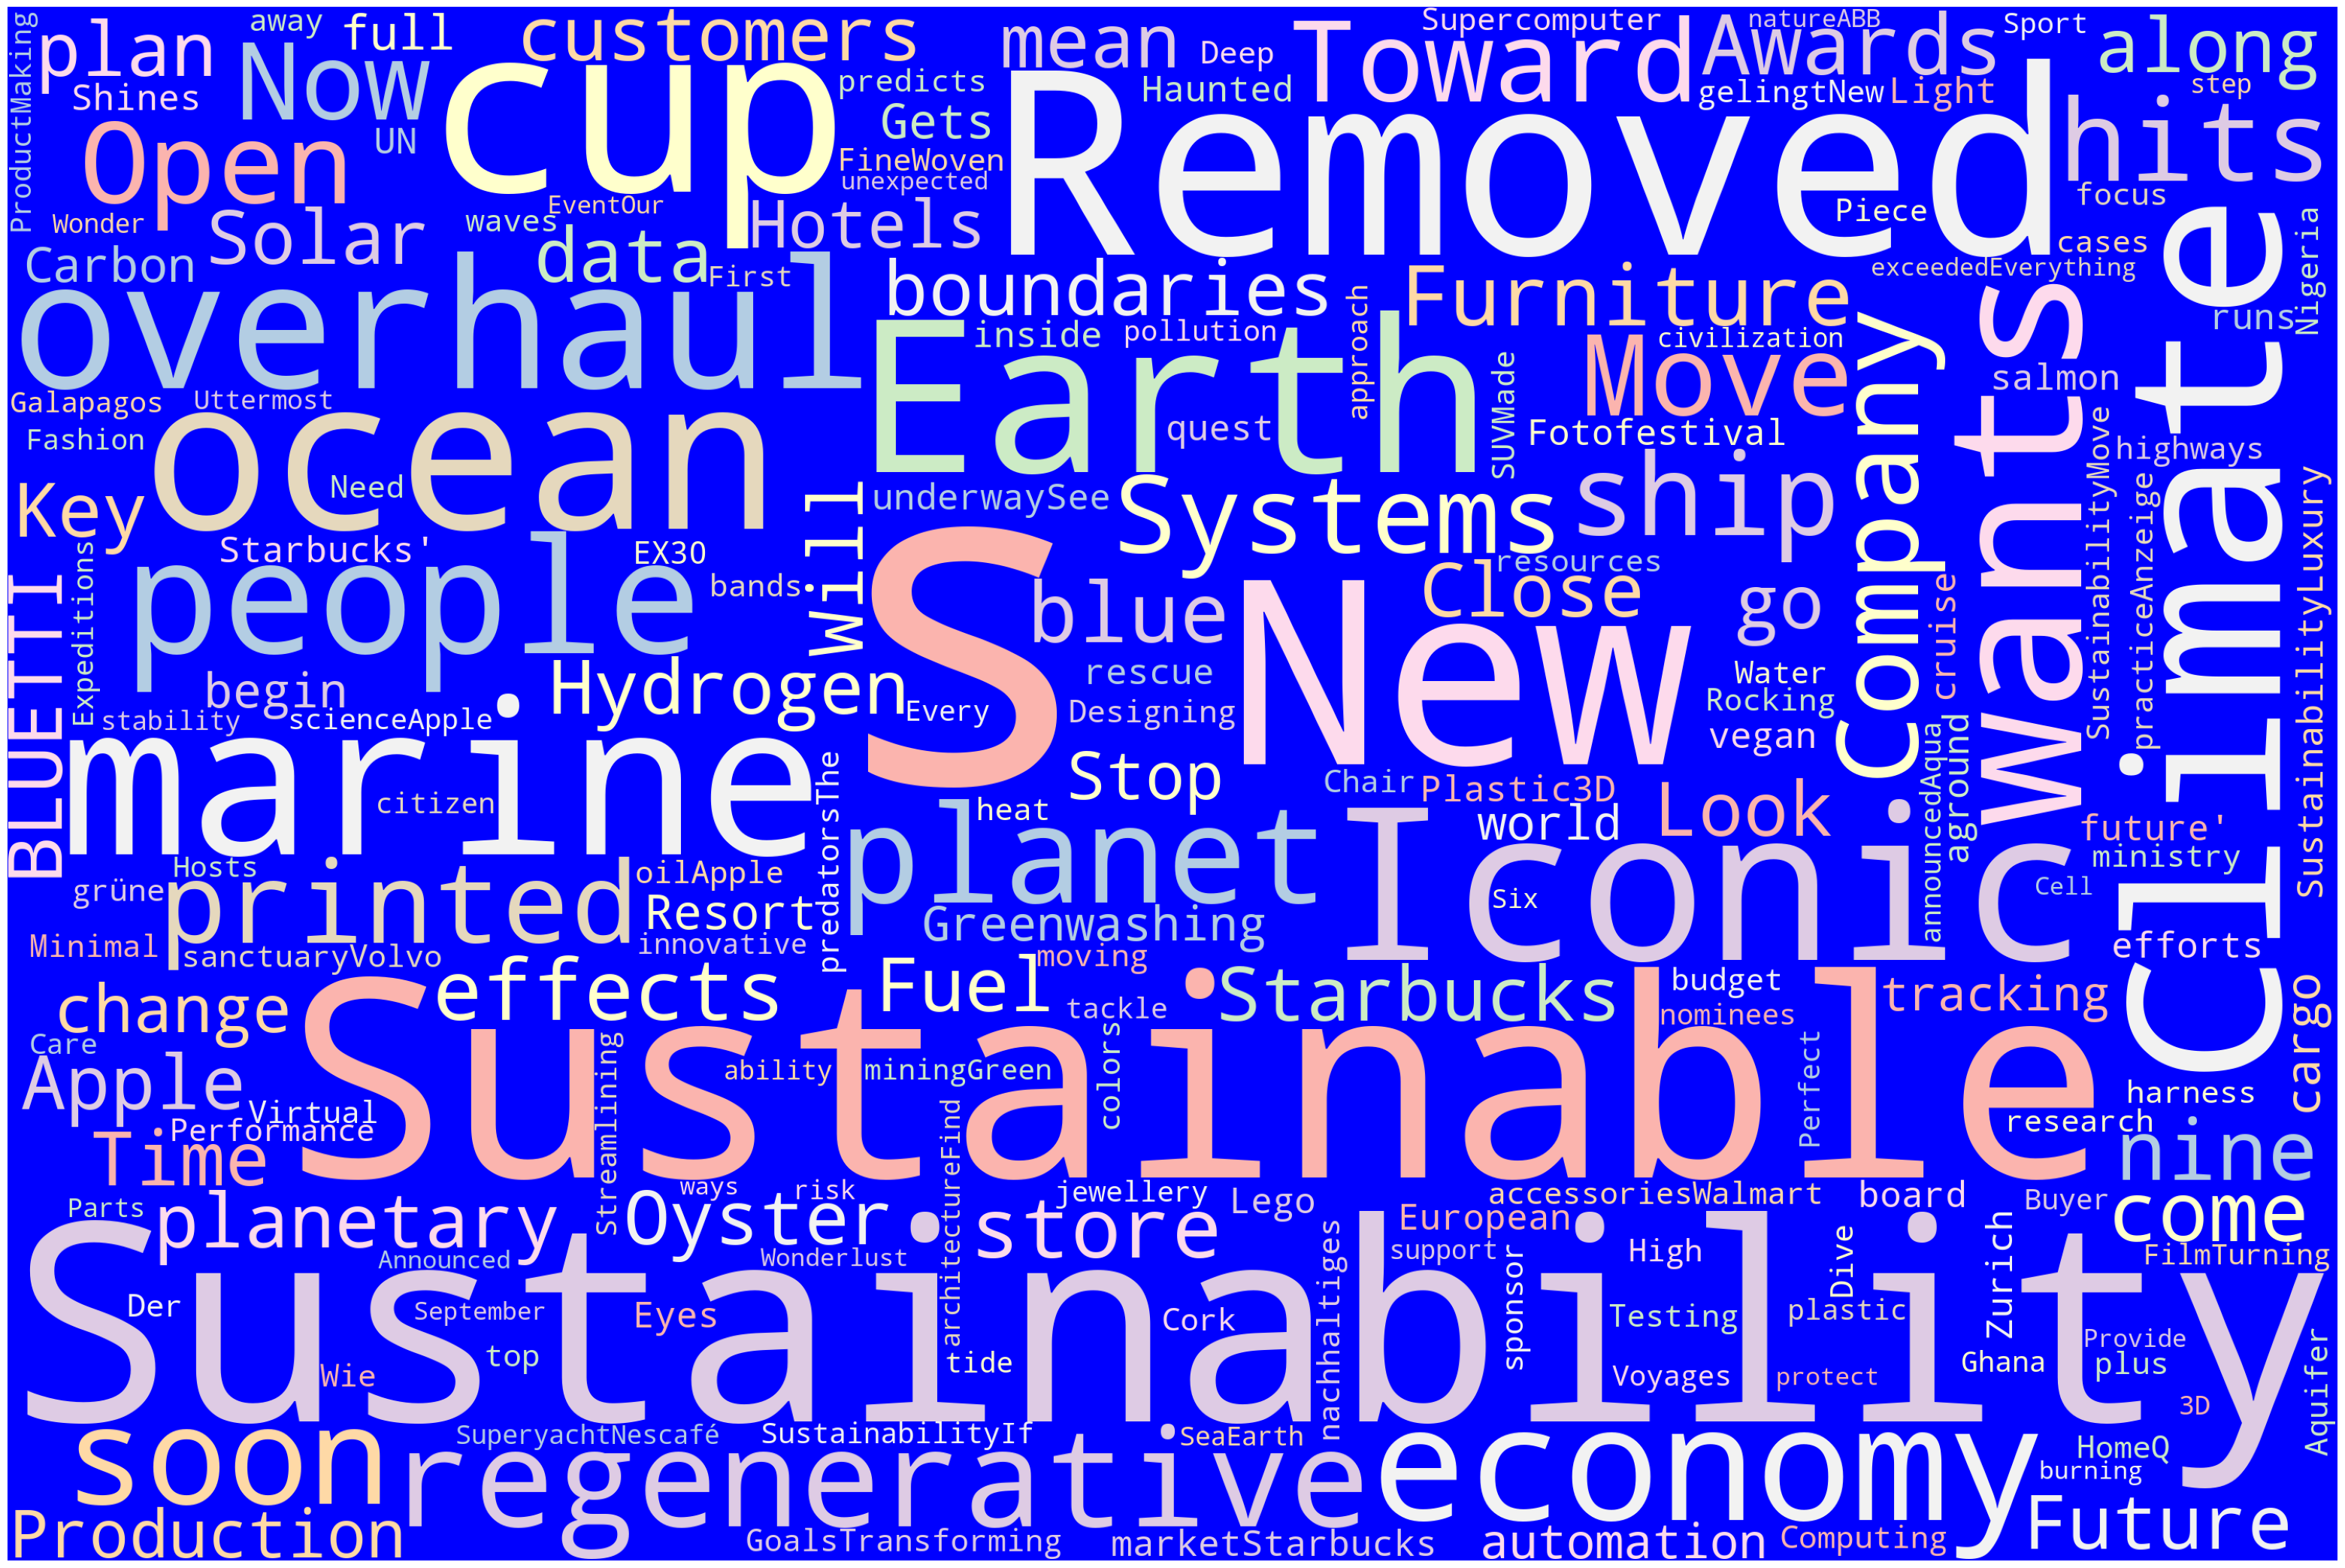

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def generate_word_cloud(my_text):
    def plot_cloud(wordcloud):
        plt.figure(figsize=(40, 30))
        plt.imshow(wordcloud) 
        plt.axis("off");
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='blue', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()
generate_word_cloud(title_string + description_string)